In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/Real_Estate.csv")

In [3]:
data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [5]:
data['Transaction date'] = pd.to_datetime(data['Transaction date'])

In [6]:
X = data.drop(columns=['House price of unit area'],axis=1)
y = data['House price of unit area']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=42)

In [11]:
print(f"Training shape :{X_train.shape}")
print(f"Testing shape :{X_test.shape}")
print(f"Training Y :{y_train.shape}")
print(f"Testing Y :{y_test.shape}")

Training shape :(331, 6)
Testing shape :(83, 6)
Training Y :(331,)
Testing Y :(83,)


**Preprocessing**

**Linearity**

In [12]:
data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [14]:
columns=X.columns
print(columns)

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude'],
      dtype='object')


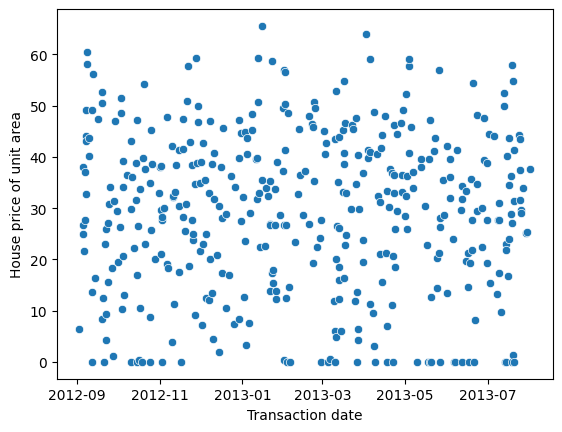

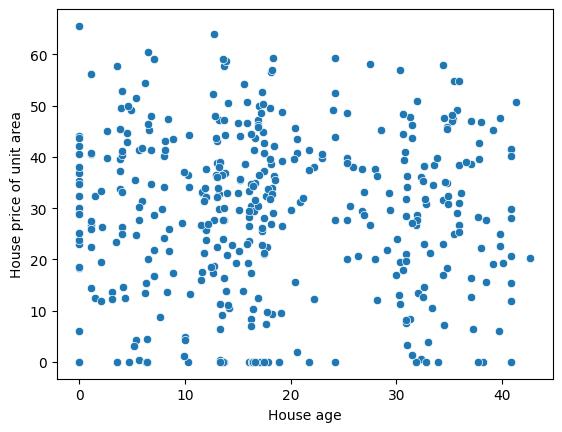

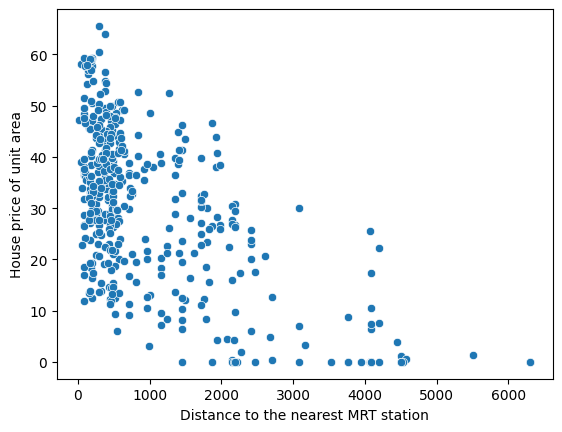

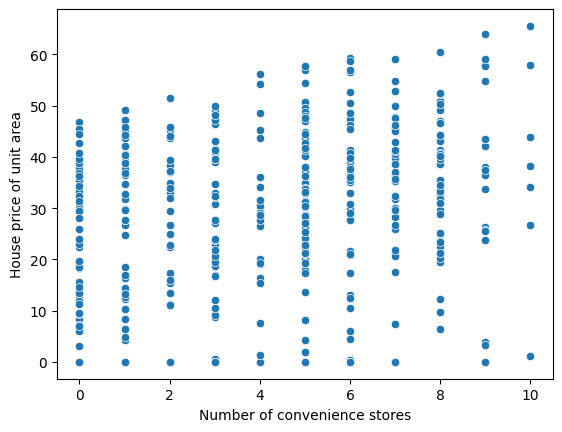

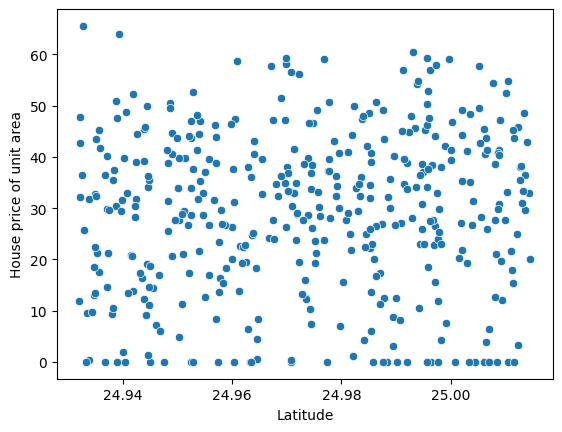

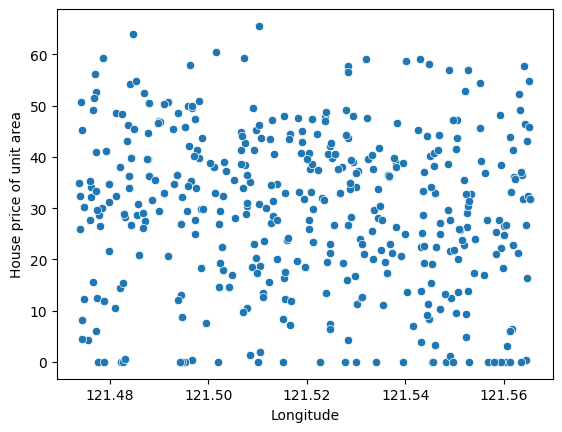

In [15]:
for i in columns:
  sns.scatterplot(x=data[i],y=data['House price of unit area'])
  plt.xlabel(i)
  plt.ylabel("House price of unit area")
  plt.show()

<Figure size 1000x1000 with 0 Axes>

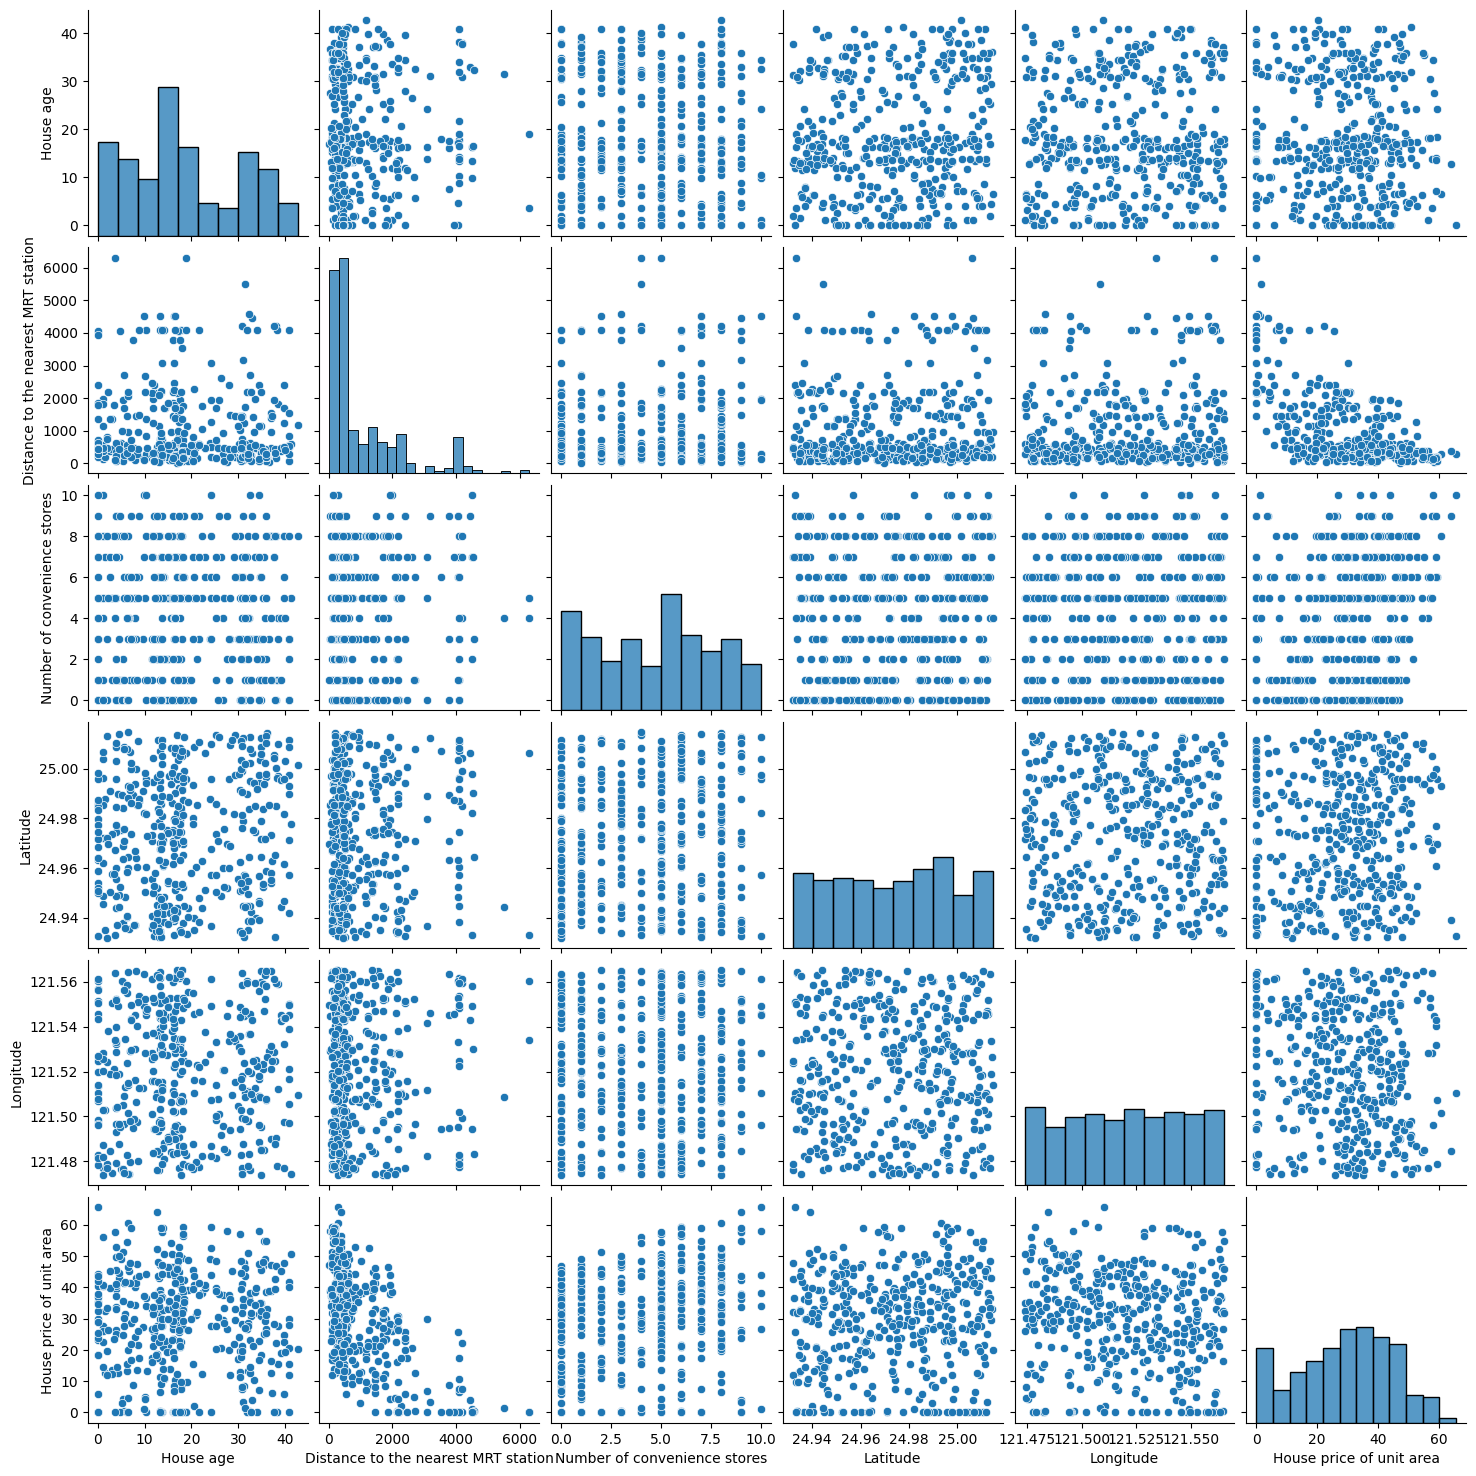

In [16]:
plt.figure(figsize=(10,10))
sns.pairplot(data)
plt.show()

**Multicollinearity**

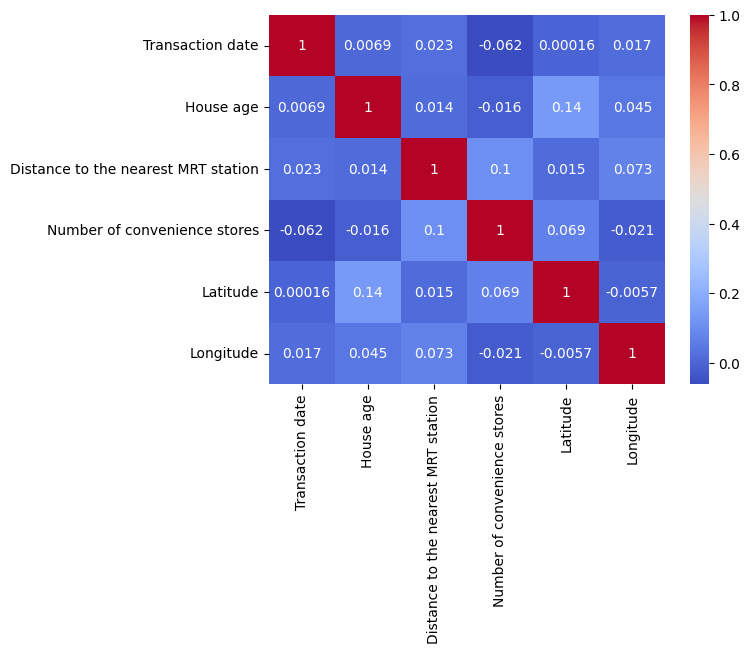

In [18]:
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

**Variance Inflation Factor**

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
vif_df = pd.DataFrame()

In [22]:
vif_df['feature'] = X_train.columns

In [32]:
X_train.values

array([[1.33000000e+01, 2.14737600e+03, 3.00000000e+00, 2.49337321e+01,
        1.21564450e+02],
       [1.92000000e+01, 9.04560600e+01, 5.00000000e+00, 2.49864180e+01,
        1.21478117e+02],
       [1.33000000e+01, 2.79172600e+02, 2.00000000e+00, 2.49949935e+01,
        1.21543823e+02],
       ...,
       [3.04000000e+01, 4.44133400e+02, 0.00000000e+00, 2.49508150e+01,
        1.21544501e+02],
       [2.00000000e+01, 5.52437100e+02, 1.00000000e+00, 2.49580656e+01,
        1.21477361e+02],
       [3.49000000e+01, 2.18512800e+03, 6.00000000e+00, 2.50088860e+01,
        1.21485673e+02]])

In [44]:
X_train.columns

Index(['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude'],
      dtype='object')

In [45]:
X_train.dtypes

,0
House age,float64
Distance to the nearest MRT station,float64
Number of convenience stores,int64
Latitude,float64
Longitude,float64


In [43]:
vif_df.head()

,feature
0,Transaction date
1,House age
2,Distance to the nearest MRT station
3,Number of convenience stores
4,Latitude


In [38]:
variance_inflation_factor(X_train.values,4)

np.float64(1048083.0124045245)

In [49]:
vif_df = pd.DataFrame({
    "Feature": X_train.columns,
    "VIF": [variance_inflation_factor(X_train.values, i)
            for i in range(X_train.shape[1])]
})

vif_df

,Feature,VIF
0,House age,3.434393e+00
1,Distance to the nearest MRT station,1.795635e+00
2,Number of convenience stores,3.331534e+00
3,Latitude,1.048699e+06
4,Longitude,1.048083e+06


In [50]:
vif_df['VIF SCORE']=[variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]

In [51]:
vif_df

,Feature,VIF,VIF SCORE
0,House age,3.434393e+00,3.434393e+00
1,Distance to the nearest MRT station,1.795635e+00,1.795635e+00
2,Number of convenience stores,3.331534e+00,3.331534e+00
3,Latitude,1.048699e+06,1.048699e+06
4,Longitude,1.048083e+06,1.048083e+06


**Fit the Model**

In [24]:
model = LinearRegression()

In [42]:
X_train.drop(columns=['Transaction date'],axis=1,inplace=True)

KeyError: "['Transaction date'] not found in axis"

In [52]:
model.fit(X_train,y_train)

LinearRegression()

In [53]:
print("X_train columns:", X_train.shape[1])
print("vif_df rows:", vif_df.shape[0])


X_train columns: 5
vif_df rows: 5


In [54]:
y_train_predictions = model.predict(X_train)

**Evaluate the Learning**

In [55]:
mean_absolute_error(y_train,y_train_predictions)

9.196036635643168

**Polynomial transformation**

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
order = 2
poly_features = PolynomialFeatures(degree=order)
X_ploy = poly_features.fit_transform(X_train)
model_poly = LinearRegression()
model_poly.fit(X_ploy,y_train)



LinearRegression()

In [58]:
y_train_poly = model_poly.predict(X_ploy)

In [59]:
mean_absolute_error(y_train,y_train_poly)

8.937847779392582